In [1]:
### Daten einlesen
## Daten von Kaggle: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

# CSV-File einlesen - mit Library pandas
import pandas as pd
df = pd.read_csv('../../../data/Customer-Churn-Records.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# Für das Feature "Gender" eine One-Hot-Encoding machen und als neue Features hinzufügen
df = pd.get_dummies(df, columns=['Gender'])

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,True,False
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,True,False
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,True,False
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,True,False
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,True,False


<Axes: >

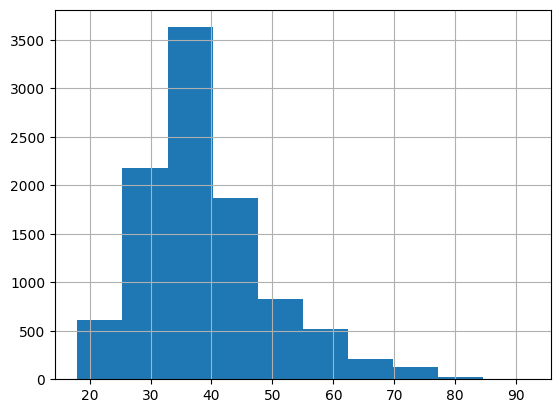

In [5]:
# Visuell prüfen ob das Feature "Age" einer Normalverteilung oder Gleichverteilung folgt
df['Age'].hist()

In [6]:
# Kolmogorov-Smirnov-Test, um zu prüfen ob eine Normalverteilung gegeben
from scipy.stats import shapiro
statistic, p_value = shapiro(df['Age'])

print('Statistik:', statistic)
print('p-Wert:', p_value)

Statistik: 0.9441067968735424
p-Wert: 1.3079365657693273e-51


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: >

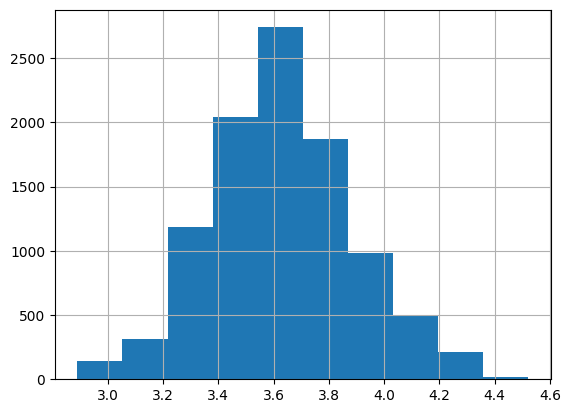

In [7]:
import numpy as np
df['Age_log'] = np.log(df['Age'])
df['Age_log'].hist()

In [8]:
from scipy.stats import shapiro
statistic, p_value = shapiro(df['Age_log'])

print('Statistik:', statistic)
print('p-Wert:', p_value)

Statistik: 0.9943890448021673
p-Wert: 2.449757644719759e-19


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
# Daten standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age_log_std'] = scaler.fit_transform(df[['Age_log']])

<Axes: >

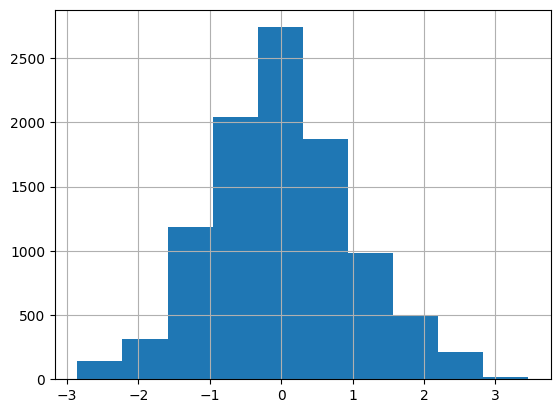

In [10]:
df['Age_log_std'].hist()

In [11]:
from scipy.stats import shapiro
statistic, p_value = shapiro(df['Age_log_std'])

print('Statistik:', statistic)
print('p-Wert:', p_value)

Statistik: 0.9943890448021673
p-Wert: 2.449757644719759e-19


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


# **Nun sind Sie dran**
Schauen Sie sich andere Features an...

*   ... wo macht ein One-Hot-Encoding Sinn?
*   ... was für Verteilungen haben andere Features? Sollten diese transformiert und standardisiert werden?

